## 🧮 Resolução da EDO com Euler Explícito
EDO: y'' − 3y' + 2y = 6e^(−t),  com y(0) = 2 e y'(0) = 2
Intervalo: [0, 0.2], passo h = 0.1
Solução exata: y(t) = 2e^(2t) − e^t + e^(−t)



In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

In [3]:
# Passo e valores de t
h = 0.1
t_values = np.arange(0, 0.2 + h, h)

# Condições iniciais
y1 = [2]  # y(t)
y2 = [2]  # y'(t)

In [4]:
# Método de Euler Explícito
for i in range(len(t_values) - 1):
    t = t_values[i]
    y1_next = y1[i] + h * y2[i]
    y2_next = y2[i] + h * (3 * y2[i] - 2 * y1[i] + 6 * np.exp(-t))
    y1.append(y1_next)
    y2.append(y2_next)

In [5]:
# Solução exata
y_exact = [2 * math.exp(2 * t) - math.exp(t) + math.exp(-t) for t in t_values]

# Cálculo do erro absoluto
errors = [abs(y_aprox - y_real) for y_aprox, y_real in zip(y1, y_exact)]


In [6]:
# Tabela de comparação
df = pd.DataFrame({
    "t": t_values,
    "Euler (aprox)": y1,
    "Solução exata": y_exact,
    "Erro absoluto": errors
})

In [7]:
df.round(6)


,t,Euler (aprox),Solução exata,Erro absoluto
0,0.0,2.00000,2.000000,0.000000
1,0.1,2.20000,2.242472,0.042472
2,0.2,2.48000,2.580977,0.100977
3,0.3,2.85429,3.035197,0.180907


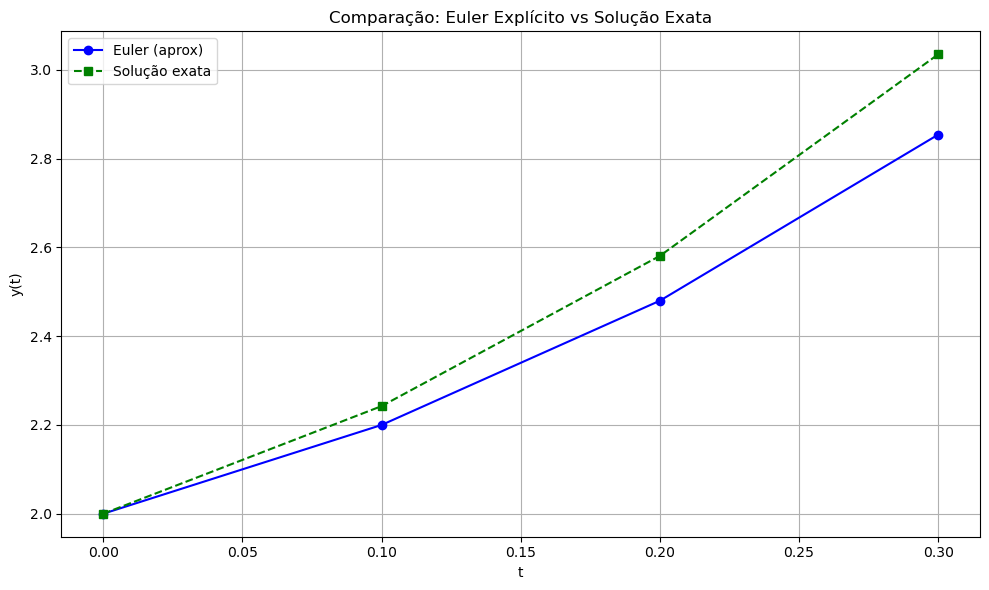

In [8]:
# Gráfico comparativo
plt.figure(figsize=(10, 6))
plt.plot(t_values, y1, 'o-', label='Euler (aprox)', color='blue')
plt.plot(t_values, y_exact, 's--', label='Solução exata', color='green')
plt.title('Comparação: Euler Explícito vs Solução Exata')
plt.xlabel('t')
plt.ylabel('y(t)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
